# Final Project: EDA of Extremism

### Course: DSC 530  
### Author: Figueroa, Holly  
### Objective: EDA on variables from Skoczylis, Joshua, 2021, "Extremism, Life Experiences and the Internet" 

In [50]:
from __future__ import print_function, division
import statsmodels.formula.api as smf
import pandas as pd
import seaborn as sns
import numpy as np
import analytic
import random
import thinkstats2
import thinkplot
import scipy.stats as stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#Read file into df
complete_df = pd.read_csv('ExtremismDataset2.0.csv')
complete_df = pd.DataFrame(complete_df)

In [3]:
# Choose columns to include
select_df1 = complete_df.iloc[ : , 0:19]
select_df2 = complete_df.iloc[ : , 370:380]

In [4]:
#Check Row lengths match
len(complete_df), len(select_df1), len(select_df2)

(2552, 2552, 2552)

In [5]:
#Join dfs of chosen columns & validate length
combined_df = select_df1.join(select_df2)
len(combined_df)

2552

In [6]:
# Iterate through columns to get index names for easier data prep/narrowing for project

for col in combined_df.columns:
    index_no = combined_df.columns.get_loc(col)
    print(index_no , col)

0 Index
1 Progress
2 Age
3 HouseoldIncome
4 Household_Dependents
5 Gender_2
6 Gender
7 UK_Resident
8 Ethnicity
9 Ethnicity_selfDefined
10 Religious_Affilation
11 Relationship_Status
12 Socio-economic_Status
13 Living_Arrangments
14 Houseold_Debt_in_Thousand_of_£
15 Highest_Qualification
16 Occupation_Qualitative
17 Postcode
18 City
19 SocialMedia_Use
20 Extremism_ScorePCA
21 Extermism_scoreScaled
22 Strain_Resilience_score
23 Strain_Score
24 Resilience_score
25 Confidence_inSelf
26 Political_Engagment
27 Political_LeaningRight_Left
28 Racism_scale


In [7]:
# Narrow down columns to include for analysis
combined_df = combined_df.iloc[ :,[2,6,10,19,21,27,28]]


In [8]:
# Re-validate length
len(combined_df)

2552

In [9]:
# Iterate through columsn to get index and column names again
for col in combined_df.columns:
    index_no = combined_df.columns.get_loc(col)
    print(index_no , col)

0 Age
1 Gender
2 Religious_Affilation
3 SocialMedia_Use
4 Extermism_scoreScaled
5 Political_LeaningRight_Left
6 Racism_scale


In [10]:
# Correlation Matrix for quick review of potential relationships for further analysis
combined_df.corr()

,Age,Gender,Religious_Affilation,SocialMedia_Use,Extermism_scoreScaled,Political_LeaningRight_Left,Racism_scale
Age,1.000000,0.119521,-0.150121,-0.126497,-0.181523,-0.131424,0.013147
Gender,0.119521,1.000000,-0.018694,-0.035427,-0.215532,0.146910,0.131347
Religious_Affilation,-0.150121,-0.018694,1.000000,0.036402,0.047961,0.268064,0.197412
SocialMedia_Use,-0.126497,-0.035427,0.036402,1.000000,0.123187,0.082792,-0.004479
Extermism_scoreScaled,-0.181523,-0.215532,0.047961,0.123187,1.000000,-0.181616,-0.266799
Political_LeaningRight_Left,-0.131424,0.146910,0.268064,0.082792,-0.181616,1.000000,0.627832
Racism_scale,0.013147,0.131347,0.197412,-0.004479,-0.266799,0.627832,1.000000


## Variable Summaries  

In [11]:
# Review quick summaries for familiarity
combined_df.describe()

,Age,Gender,Religious_Affilation,SocialMedia_Use,Extermism_scoreScaled,Political_LeaningRight_Left,Racism_scale
count,1800.000000,2534.000000,2549.000000,2342.000000,2333.000000,2383.000000,2525.000000
mean,50.266111,0.340963,1.235779,-0.000580,0.806723,0.002441,0.001179
std,16.490797,0.474126,1.197410,1.002803,1.402327,0.998769,0.998958
min,5.000000,0.000000,0.000000,-1.402474,0.000000,-2.821735,-3.314837
25%,38.000000,0.000000,0.000000,-0.688714,0.000000,-0.786440,-0.532733
50%,55.000000,0.000000,2.000000,-0.212874,0.000000,0.098471,0.262154
75%,63.000000,1.000000,2.000000,0.500885,1.023645,0.806400,0.659597
max,85.000000,1.000000,5.000000,7.103162,9.000000,2.310748,1.057040


## Histograms, Cleaning/Explain Outliers Handling, Mean, Mode, Spread, and Tails

### Age  Summary
The histogram for age shows a negatively skewed, bi-modal distribution where a greater proprotion of participants were aged under 25, and and even greater proportion aged between 50 and 70 years old. An outlier for AGE appears to have a respondent at age 5, but source documents state only those 16 or older we're allowed to participate. Will adjust code to include ages 16 or older. 

* Continuous variable
* Bimodal
* Moderate negative skew (-0.53)
* Mean age 50
* Age range 16-85 years old
* One outlier - 5yr old participant - likely a typo (removed)


<Axes: xlabel='Age', ylabel='Count'>

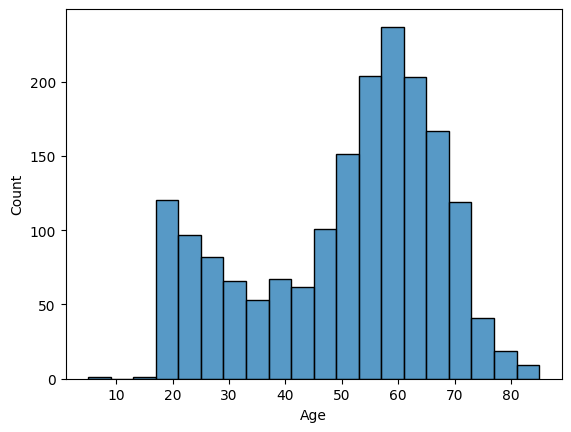

In [12]:
# Create histogram
sns.histplot(data=combined_df, x= combined_df['Age'], bins =20)

<Axes: xlabel='Age', ylabel='Count'>

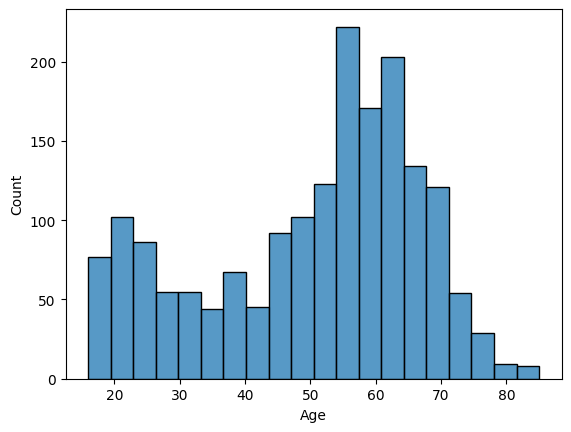

In [13]:
# Remove what appear to be age value errors - ages under 16
combined_df = combined_df[combined_df.Age > 15]
sns.histplot(data=combined_df, x= combined_df['Age'], bins = 20)

In [14]:
# Get Central Measures for Age
age = combined_df['Age']

age.describe()

count    1799.000000
mean       50.291273
std        16.460783
min        16.000000
25%        38.500000
50%        55.000000
75%        63.000000
max        85.000000
Name: Age, dtype: float64

In [15]:
age.mode()

0    57.0
Name: Age, dtype: float64

In [16]:
age.skew()

-0.5398928968642979

### Gender Summary

* Nominal variable coded 0-1 (male/female)
* Almost 2x more male participants than female
* 1784 total


<Axes: >

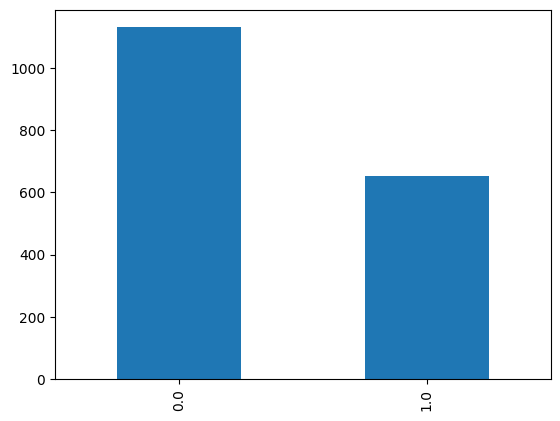

In [17]:
#Mak gender variable and make plot of counts
gender = combined_df['Gender']

gender.value_counts().plot(kind='bar')

In [18]:
gender.value_counts()

0.0    1130
1.0     654
Name: Gender, dtype: int64

### Religious Affiliation Summary

0 = Christian          (753)  
1 = Buddhist           (9)  
2 = I am not religious (964)  
3 = Jewish             (17)  
4 = Muslim             (8)  
5 = Other              (47)  


* Nominal variable
* 2255 total responses
* 76% responded either 'I am not religious' or 'Christian'
* Mode response 'I am not religous" 
* <50 count for all other responses

In [19]:
#Check column spelling
print(combined_df.columns)

Index(['Age', 'Gender', 'Religious_Affilation', 'SocialMedia_Use',
       'Extermism_scoreScaled', 'Political_LeaningRight_Left', 'Racism_scale'],
      dtype='object')


<Axes: >

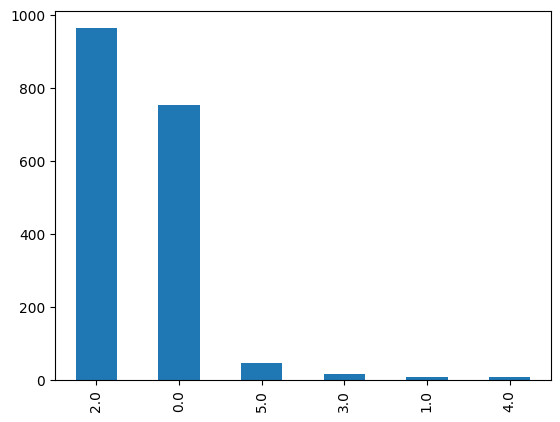

In [20]:
# Plot Response Codes for Religious Affiliation
combined_df['Religious_Affilation'].value_counts().plot(kind='bar')

In [21]:
# Value Counts for each response
combined_df['Religious_Affilation'].value_counts()

2.0    964
0.0    753
5.0     47
3.0     17
1.0      9
4.0      8
Name: Religious_Affilation, dtype: int64

In [22]:
# Get total
combined_df['Religious_Affilation'].sum()

2255.0

In [23]:
# Get percentage that 2 highest responses take of the total
(964+753)/2255 *100

76.14190687361419

### Social Media Use Score Summary
Sum score based on likert survey results asking abotu social media use of a variety of platforms. Sum scores were then standardized. Lower values indicating no use or never using social media type. This distribution has a strong positive skew which was measured at 1.53. The sharp peak and long tail is also reflected in the high measure for kurtosis at 3.92, with strong leptokurtic shape with a long tail. The average of 0.02 suggests that majority of those interviewed either rarely or never used social media. A couple of outliers suggest a few used it extensively. These outliers will be kept in place, as these are unlikely to be in error. 

* Continuous variable ranging from 'never use' (low) to 'always use' (high)
* High positive skew (1.53)
* Leptokurtic (kurt = 3.92)
* Range -1.4 to 7.1 
* 75% of values are under 1
* Mode - 0.33
* Mean 0.02
* Median 0.21

<Axes: xlabel='SocialMedia_Use', ylabel='Count'>

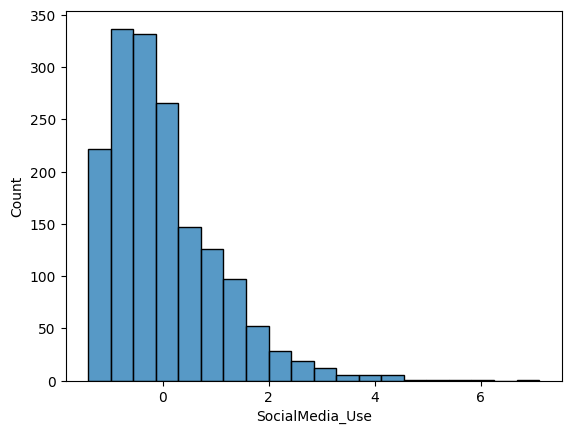

In [24]:
social = combined_df['SocialMedia_Use']

# Create histogram
sns.histplot(data=combined_df, x= social, bins =20)

In [25]:
social.describe()

count    1658.000000
mean        0.028812
std         1.045180
min        -1.402474
25%        -0.688714
50%        -0.212874
75%         0.500885
max         7.103162
Name: SocialMedia_Use, dtype: float64

In [26]:
social.mode()

0   -0.331834
Name: SocialMedia_Use, dtype: float64

In [27]:
social.median()

-0.212874344

In [28]:
social.skew(), social.kurt()

(1.5256000489382344, 3.924979154504209)

### Political Leanings Summary
The distribution for political leanings appears bimodal, a feature that may be expected of a variable known to be "polarized". There are two peaks, or modes, the tallest around .08, then another around -1.0. There are no clear outliers.

* Continuous varible ranging low (right of center) to high (left of center)
* Bimodal distribution
* Standardized scores based on likert responses regarding political views
* Score range -2.82 to 2.31

<Axes: xlabel='Political_LeaningRight_Left', ylabel='Count'>

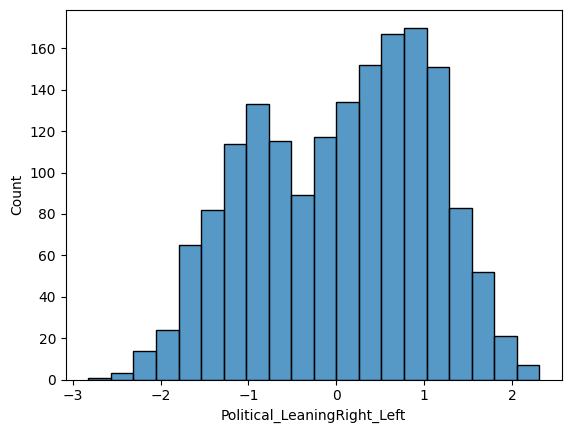

In [29]:
politics = combined_df['Political_LeaningRight_Left']

sns.histplot(data=combined_df, x= politics, bins =20)

In [30]:
politics.describe()

count    1694.000000
mean        0.045397
std         0.995005
min        -2.821735
25%        -0.786440
50%         0.098471
75%         0.872768
max         2.310748
Name: Political_LeaningRight_Left, dtype: float64

In [31]:
politics.median(), politics.mode()

(0.09847074,
 0    0.540926
 1    0.629417
 2    0.806400
 3    0.894891
 Name: Political_LeaningRight_Left, dtype: float64)

### Racism Score Summary
The distribution for racism is unimodal and skewed. The measure for skew borderlines high at 0.998. The values for racism scores were gained through likert-style survey and the responses were summed and standardized. Due the shape of this distribution, further measures such as median and mode were preferred over mean. 

* Continuous
* Scaled scores range from low values (high racism scores) to higher values (low racism scores)
* Scores ranged from -3.31 to 1.06
* Median score at 0.03, but the mode score was high (1.05)
* Over 25% of scores were under zero

<Axes: xlabel='Racism_scale', ylabel='Count'>

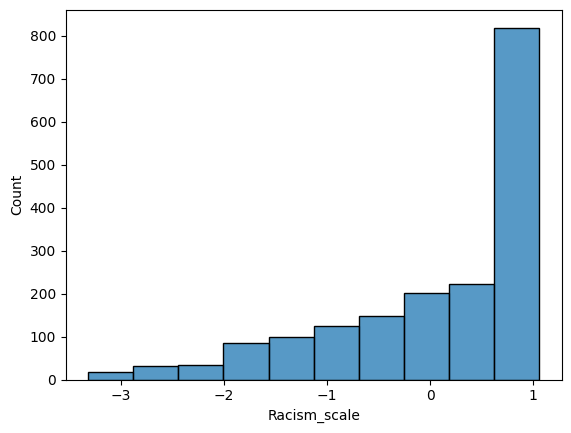

In [51]:
racism = combined_df['Racism_scale']
sns.histplot(data=combined_df, x= racism, bins =10)

In [52]:
racism.describe()

count    1781.000000
mean        0.035202
std         0.998032
min        -3.314837
25%        -0.532733
50%         0.262154
75%         0.659597
max         1.057040
Name: Racism_scale, dtype: float64

In [53]:
racism.median()

0.262153509

In [54]:
racism.skew(), racism.kurt()

(-0.9989831042023252, 0.3252569396364029)

In [55]:
racism.mode()

0    1.05704
Name: Racism_scale, dtype: float64

### Extremism Summary
Extremism is a continuous variable gained from likert-style survey questions. PCA scaling was used and results standardized to create a 0-10 scale score result where 0 is least extreme. Results suggest the only a very small minority of participants were found to have extremist views. The skew of these results was very high at 2.25 and scores for kurtosis at 5.21 reflect the tall, singular peak of the distribution seen in the graph. 

* Strong positive skew (2.25)
* Resulting scores ranged from 0 - 9
* over 75% scored at 1.06 or less

<Axes: xlabel='Extremism', ylabel='Count'>

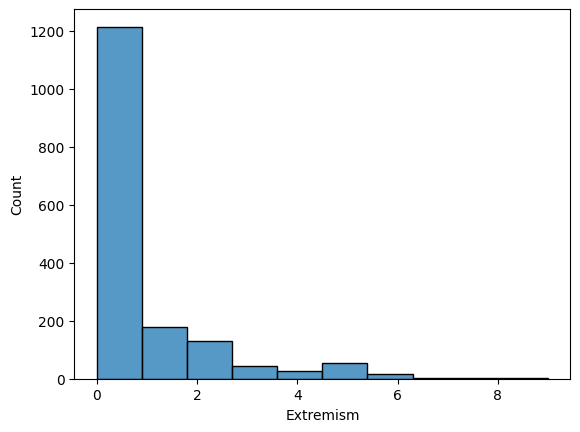

In [56]:
#rename column
combined_df = combined_df.rename(columns={'Extermism_scoreScaled': 'Extremism'})

#Create variable for column
extremism = combined_df['Extremism']

# Create plot
sns.histplot(data=combined_df, x= extremism, bins =10)

In [57]:
extremism.skew(), extremism.kurt()

(2.245545780356331, 5.205256902228754)

In [58]:
extremism.mode(), extremism.median()

(0    0.0
 Name: Extremism, dtype: float64,
 0.0)

In [59]:
extremism.describe()

count    1673.000000
mean        0.793472
std         1.364567
min         0.000000
25%         0.000000
50%         0.000000
75%         1.063198
max         9.000000
Name: Extremism, dtype: float64

## PMF Exploration

<Axes: xlabel='Extremism', ylabel='Count'>

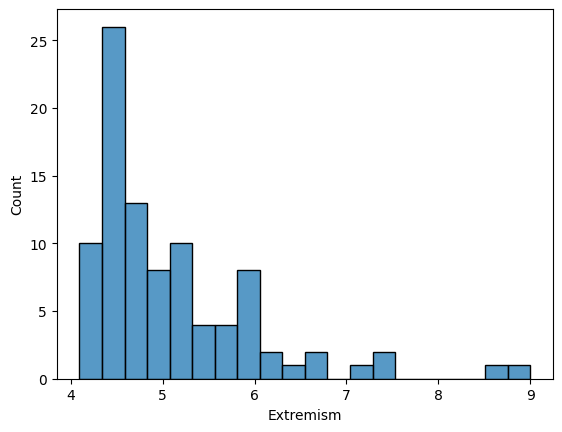

In [60]:
# Explore attributes for participants with the highest scores for extremism. We will use 4 as the split

high_extremism = combined_df[combined_df.Extremism >= 4]
sns.histplot(data=combined_df, x= high_extremism['Extremism'], bins =20)



In [61]:
# Check sample size left after change
len(high_extremism)

93

In [62]:
# Create group for the other half of the split and adjust sample to match for easier comparison

other_extremism = combined_df[combined_df.Extremism < 4]
other_extremism = other_extremism.sample(n=93, axis = 0, random_state = 20)

In [63]:
# Validate lengths match
len(other_extremism)

93

In [64]:
# Create histogram/pmf of political view for respondents with higher extremism scores
high_hist = thinkstats2.Hist(high_extremism)
high_pmf = thinkstats2.Pmf(high_extremism.Political_LeaningRight_Left, label='Extreme')

# Create histogram/pmf of political view for respondents with lower extremism scores
other_hist = thinkstats2.Hist(other_extremism)
other_pmf = thinkstats2.Pmf(other_extremism.Political_LeaningRight_Left, label='Less_Extreme')

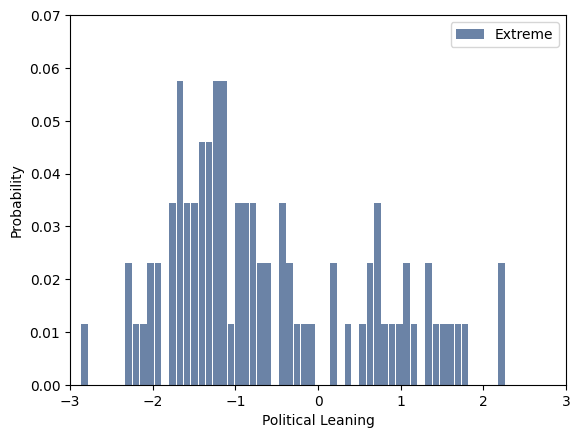

In [65]:
# Plot PMF of political leaning for group with higher extremist scores
thinkplot.Hist(high_pmf)
thinkplot.Config(xlabel='Political Leaning', ylabel='Probability', axis =[-3, 3 , 0, .07])


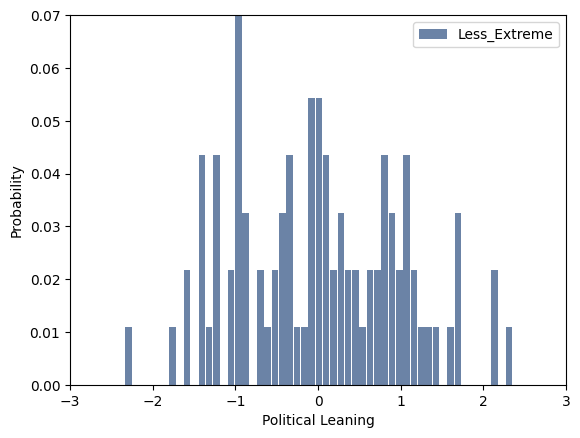

In [66]:
# Plot PMF for political leaning for group with lower extremist scores

thinkplot.Hist(other_pmf)
thinkplot.Config(xlabel='Political Leaning', ylabel='Probability', axis =[-3, 3 , 0, .07])

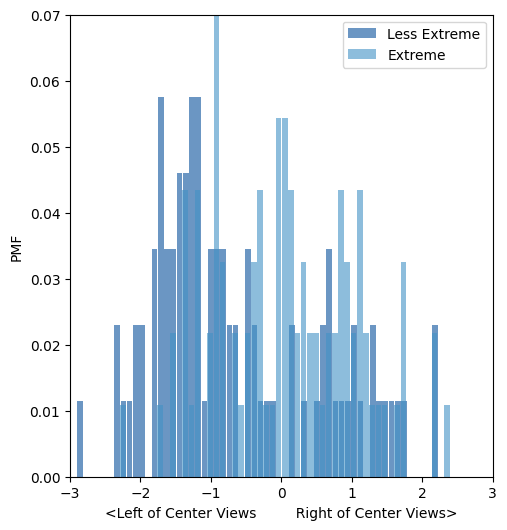

In [68]:
# Plot PMF together for better comparison
#thinkplot.PrePlot(2,cols = 2)
width = .08
axis=[-3,3, 0, 0.07]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(high_pmf, align='right', width = width, label = "Less Extreme")
thinkplot.Hist(other_pmf, align='left', width = width, label = "Extreme")
thinkplot.Config(xlabel='<Left of Center Views         Right of Center Views>', ylabel='PMF', axis = axis )

### PMF Conclusion  
To explore possibe attributes of extremist views those data points were split to explore possible differences in political leanings. To create a sample size over 50 that also captured higher than most scores, a threhold was chosen to split the pool at a score of 4. Those with extremism scores under four were in one group, called "other_extremism" and those with 4 or greater extremism scores were put into the group "high_extremism". The resulting sample for high-extremism was 93, so a sample was taken from the larger,'other', group to match. This clarified the resulting PMF Plot comparing both groups political views. When we split our sample into groups based on their extremism score the pmf of political views shows some clear variation. The plotted pmf suggests that those higher extremism scores have higher probabilities of having Right-of-Center views in the UK. Inversely, it appears that those with lower extremism scores have higher probabilities of having Left-of-Center views in the UK.

## CDF Exploration  
The cdf of participants extremism scores suggests that around 80% of scores were 2 or lower. On a scale that goes as high as 10, is reflects the difficulty is capturing data on what are rare views. It must also be taken into consideration, that  many respondents might have difficulty sharing what many would consider to be, unacceptable views. Looking at data related to those individuals with unusually high extremism scores might be a better way to see potential influences from a set of variables. When comparing CDFS for extremism views split by political views, we see very different results for these groups.

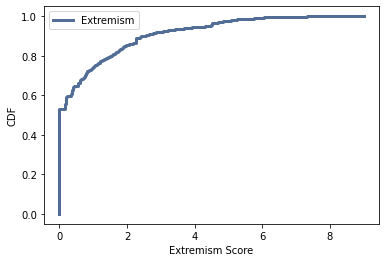

<Figure size 576x432 with 0 Axes>

In [49]:
cdf = thinkstats2.Cdf(extremism, label = 'Extremism')
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel = 'Extremism Score', ylabel = 'CDF')

In [50]:
cdf1 = thinkstats2.Cdf(high_extremism.Political_LeaningRight_Left, label = "Higher Extremism")
cdf2 = thinkstats2.Cdf(other_extremism.Political_LeaningRight_Left, label = "Other Extremism")


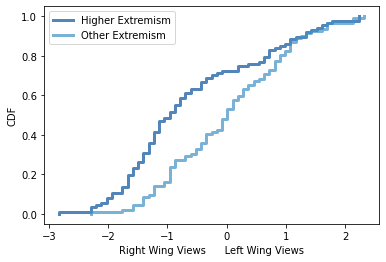

<Figure size 576x432 with 0 Axes>

In [51]:
thinkplot.PrePlot(2)
thinkplot.Cdfs([cdf1,cdf2])
thinkplot.Show(xlabel = 'Right Wing Views      Left Wing Views', ylabel = 'CDF' )

## Normal Probability Plot  
A normal probability plot was create to test whether an analytical distribution is a good model for our extremism score data. A normal probability plot illustrates clearly the data for extremism scores is not suited for a linear model. The ideal straight diagonal line is what we might hope to see, but this was not the case. The highly skewed scores in the data show that probability favors scores above 0. Again this illustrates how only a minority of people scored below zero (higher extremism scores = negative scores). 

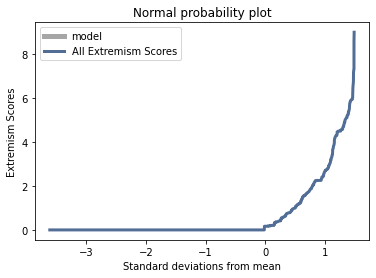

In [52]:
mean, var = thinkstats2.TrimmedMeanVar(extremism, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, inter = mean, slope = std)
thinkplot.Plot(fxs, fys, linewidth=5, color='gray', label = 'model')

xs, ys = thinkstats2.NormalProbability(extremism)
thinkplot.Plot(xs, ys, label='All Extremism Scores')

thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='Extremism Scores')

## Create Two Scatter Plots & Kendalls Tau
The nature of extremist actors in the world is reflected in the data gathered, where only a small proportion of participants scores reflected 'high' extremism. To examine this group further I have chosen to focus my analysis on differences between participants with higher extremism scores verses lower extremism scores. Extremsism scores ranged from 0-9. To get started, a threshold was chosen at 4 to maintain a workable, although small sample size. The resulting sample size was 93, all of which scored at 4 or higher on extremism. Those scoring under 4 were grouped as "others" and a matching sample size was taken to allow for clearer comparison between groups visually in a scatter plot. The resulting plots reveal a difference in the range of scores. The more extreme group's range for racism scores was much wider going past -3, reflecting some stronger racist attitudes within the group. The other group's range was more concentrated and all values were above -3.

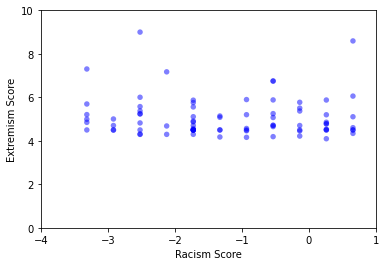

In [53]:
thinkplot.Scatter(high_extremism.Racism_scale, high_extremism.Extremism, alpha=.5)
thinkplot.Config(xlabel='Racism Score',
                 ylabel='Extremism Score',
                 axis=[-4,1, 0,10],
                 legend=False)


In [54]:
other_extremism_sampled = other_extremism.sample(axis = 0, n = 93)

#Compare groups to ensure plots have comparable n values plotted
len(other_extremism_sampled), len(high_extremism)

(93, 93)

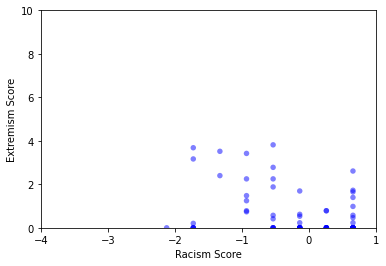

In [55]:
thinkplot.Scatter(other_extremism_sampled.Racism_scale, other_extremism_sampled.Extremism, alpha=.5)
thinkplot.Config(xlabel='Racism Score',
                 ylabel='Extremism Score',
                 axis=[-4,1, 0,10],
                 legend=False)


### Kendalls Tau with p-value , Testing Difference in Means with p-value

In [56]:
# Non-Parametric testing between extremism scores and racism scores 

#Remove nan values
combined_df = combined_df.dropna()

#Get measure for Kendalls Tau and pvalue
tau, p_value = stats.kendalltau(combined_df.Extremism, combined_df.Racism_scale)


In [57]:
combined_df.cov()

,Age,Gender,Religious_Affilation,SocialMedia_Use,Extremism,Political_LeaningRight_Left,Racism_scale
Age,266.932537,1.037506,-2.865099,-2.065917,-4.386742,-1.932050,0.574694
Gender,1.037506,0.232943,-0.007080,-0.032782,-0.150276,0.068781,0.070593
Religious_Affilation,-2.865099,-0.007080,1.358463,0.021919,0.034628,0.341781,0.238644
SocialMedia_Use,-2.065917,-0.032782,0.021919,1.134408,0.174700,0.067720,-0.039347
Extremism,-4.386742,-0.150276,0.034628,0.174700,1.802916,-0.255586,-0.407439
Political_LeaningRight_Left,-1.932050,0.068781,0.341781,0.067720,-0.255586,0.993997,0.633008
Racism_scale,0.574694,0.070593,0.238644,-0.039347,-0.407439,0.633008,1.014781


In [58]:
len(combined_df)

1448

In [59]:
tau, p_value

(-0.17940199351154318, 1.605215411181935e-18)

When conducting Kendall's Tau correlation on the data as a whole the results show a weak negative tau of -0.17 where increased scores for Extremism related to decreased scores for racism. The reverse scaling for racism means this results suggests that increases in extremist views are associated with increases in racist views. With a p_value at 1.605215411181935e-18, this small correlation appears significant and less likely due to chance from sampling. Additional testing done to compare means of both groups aslo resulted in a significant, 0.0, p-value. The sample mean for racism scores was -0.96 for those with higher extremism scores while those with lower scores had a lower mean of -0.05. 

In [60]:
#Bring in functions compare and test signficance of any difference between means

class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data


class DiffStdPermute(DiffMeansPermute):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = group1.std() - group2.std()
        return test_stat

In [61]:
# Check length matches
len(high_extremism), len(other_extremism)

(93, 93)

In [62]:
# Assign racism data from both higher and lower extremism groups to be used

data = high_extremism.Racism_scale.values, other_extremism.Racism_scale.values

In [63]:
# Check racism score means for those with higher and lower scores for extremism
high_extremism.Racism_scale.mean(), other_extremism.Racism_scale.mean()

(-0.9604170861630439, 0.12391231057608697)

In [64]:
# Test difference
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.0

### Multiple Regression Analysis

After running a multiple regression on a select couple of variables an improved result came after the creation of new categorical variables. Racism scores were used to create a new variable that coded as True for scores below 0. Another variable was created from Political Leaning that coded as True for scores less than -1. These changes dramatically improved R-Squared from 0.09 to 16.8. Including gender and age also improved R squared and adjusted R squared. Five variables were included in the final regression model. These variables included Racism Score, Racism Scores under 0, Political Leaning Scores under -1 (right of center leaning), Age, and Gender. All variables included had p-values under 0.005, showing their contribution was less likely due to sampling. Age squared was created to check for a potentially non-linear relationship, but the results did not support this change.  

In [65]:
combined_df = combined_df.dropna()

#Create categorical variable for right-of-cetner political leaning
combined_df['right'] = combined_df.Political_LeaningRight_Left <-1

#Create catergorical variable for those with high racism scores
combined_df['racist'] = combined_df.Racism_scale < 0

#Create squared age variable to check for non-linear age relationship
combined_df['Age2'] =combined_df.Age**2

#Create boolean to test if male gender improves prediction
combined_df['Male'] = combined_df.Gender == 0

In [66]:
formula = 'Extremism ~ Racism_scale + Political_LeaningRight_Left'
results = smf.ols(formula, data=combined_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Extremism   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     72.10
Date:                Sat, 20 Nov 2021   Prob (F-statistic):           1.42e-30
Time:                        20:38:52   Log-Likelihood:                -2412.0
No. Observations:                1448   AIC:                             4830.
Df Residuals:                    1445   BIC:                             4846.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.7812      0.034     23.186      0.000       0.715       0.847
Racism_scale                   -0.4000      0.043     -9.288      0.000      -0.484      -0.316
Political_LeaningRight_Left    -0.0024      0.044     -0.055      0.956      -0.088       0.083
==============================================================================
Omnibus:                      625.670   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2721.620
Skew:                           2.074   Prob(JB):                         0.00
Kurtosis:                       8.282   Cond. No.                         2.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
formula = 'Extremism ~ Racism_scale + Political_LeaningRight_Left + Age2'
results = smf.ols(formula, data=combined_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Extremism   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     68.71
Date:                Sat, 20 Nov 2021   Prob (F-statistic):           1.55e-41
Time:                        20:38:52   Log-Likelihood:                -2384.2
No. Observations:                1448   AIC:                             4776.
Df Residuals:                    1444   BIC:                             4798.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.2440      0.070     17.788      0.000       1.107       1.381
Racism_scale                   -0.3571      0.043     -8.373      0.000      -0.441      -0.273
Political_LeaningRight_Left    -0.0612      0.043     -1.410      0.159      -0.146       0.024
Age2                           -0.0002   2.21e-05     -7.511      0.000      -0.000      -0.000
==============================================================================
Omnibus:                      616.096   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2638.140
Skew:                           2.044   Prob(JB):                         0.00
Kurtosis:                       8.198   Cond. No.                     6.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
formula = 'Extremism ~ Racism_scale + Political_LeaningRight_Left + Age'
results = smf.ols(formula, data=combined_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Extremism   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     70.65
Date:                Sat, 20 Nov 2021   Prob (F-statistic):           1.24e-42
Time:                        20:38:52   Log-Likelihood:                -2381.7
No. Observations:                1448   AIC:                             4771.
Df Residuals:                    1444   BIC:                             4793.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.5909      0.108     14.696      0.000       1.379       1.803
Racism_scale                   -0.3524      0.043     -8.267      0.000      -0.436      -0.269
Political_LeaningRight_Left    -0.0641      0.043     -1.479      0.139      -0.149       0.021
Age                            -0.0161      0.002     -7.854      0.000      -0.020      -0.012
==============================================================================
Omnibus:                      614.718   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2619.407
Skew:                           2.041   Prob(JB):                         0.00
Kurtosis:                       8.173   Cond. No.                         174.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
formula = 'Extremism ~ Racism_scale + racist + Political_LeaningRight_Left + right'
results = smf.ols(formula, data=combined_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Extremism   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     41.65
Date:                Sat, 20 Nov 2021   Prob (F-statistic):           4.40e-33
Time:                        20:38:52   Log-Likelihood:                -2401.7
No. Observations:                1448   AIC:                             4813.
Df Residuals:                    1443   BIC:                             4840.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.8992      0.068     13.141      0.000       0.765       1.033
racist[T.True]                 -0.4209      0.124     -3.390      0.001      -0.664      -0.177
right[T.True]                   0.3356      0.122      2.744      0.006       0.096       0.575
Racism_scale                   -0.5538      0.065     -8.530      0.000      -0.681      -0.426
Political_LeaningRight_Left     0.0672      0.053      1.266      0.206      -0.037       0.171
==============================================================================
Omnibus:                      610.342   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2606.054
Skew:                           2.022   Prob(JB):                         0.00
Kurtosis:                       8.181   Cond. No.                         6.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Final Model

In [70]:
formula = 'Extremism ~ racist + Racism_scale + right + Age + Gender'
results = smf.ols(formula, data=combined_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Extremism   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     58.38
Date:                Sat, 20 Nov 2021   Prob (F-statistic):           1.94e-55
Time:                        20:38:52   Log-Likelihood:                -2347.4
No. Observations:                1448   AIC:                             4707.
Df Residuals:                    1442   BIC:                             4738.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.8181      0.117     15.584      0.000       1.589       2.047
racist[T.True]    -0.4364      0.119     -3.675      0.000      -0.669      -0.203
right[T.True]      0.3084      0.097      3.167      0.002       0.117       0.499
Racism_scale      -0.4831      0.061     -7.884      0.000      -0.603      -0.363
Age               -0.0147      0.002     -7.319      0.000      -0.019      -0.011
Gender            -0.4584      0.068     -6.717      0.000      -0.592      -0.325
==============================================================================
Omnibus:                      591.785   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2494.456
Skew:                           1.955   Prob(JB):                         0.00
Kurtosis:                       8.105   Cond. No.                         242.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""